# Incidence de la grippe

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
import urllib.request

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202513          7   6790     3865    9715      10           6   
1     202512          7   3858     1977    5739       6           3   
2     202511          7   5878     2747    9009       9           4   
3     202510          7   2921     1421    4421       4           2   
4     202509          7   3381     1468    5294       5           2   
5     202508          7   2835     1286    4384       4           2   
6     202507          7   4502     2382    6622       7           4   
7     202506          7   3455     1958    4952       5           3   
8     202505          7   2087     1056    3118       3           1   
9     202504          7   6895     4466    9324      10           6   
10    202503          7   2462     1161    3763       4           2   
11    202502          7   5966     2757    9175       9           4   
12    202501          7   6059     2451    9667       9           4   
13    202452          7   4356     1776    6936       7           3   
14    202451          7   4670     2239    7101       7           3   
15    202450          7   7363     4438   10288      11           7   
16    202449          7   6077     3631    8523       9           5   
17    202448          7   4189     1454    6924       6           2   
18    202447          7   1931      726    3136       3           1   
19    202446          7   2260      863    3657       3           1   
20    202445          7   2713     1216    4210       4           2   
21    202444          7   2135      676    3594       3           1   
22    202443          7   2124      641    3607       3           1   
23    202442          7   2621     1246    3996       4           2   
24    202441          7   2035      381    3689       3           1   
25    202440          7   2125      725    3525       3           1   
26    202439          7   2898     1333    4463       4           2   
27    202438          7    751        0    1513       1           0   
28    202437          7    916       28    1804       1           0   
29    202436          7   2235      870    3600       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1761  199126          7  17608    11304   23912      31          20   
1762  199125          7  16169    10700   21638      28          18   
1763  199124          7  16171    10071   22271      28          17   
1764  199123          7  11947     7671   16223      21          13   
1765  199122          7  15452     9953   20951      27          17   
1766  199121          7  14903     8975   20831      26          16   
1767  199120          7  19053    12742   25364      34          23   
1768  199119          7  16739    11246   22232      29          19   
1769  199118          7  21385    13882   28888      38          25   
1770  199117          7  13462     8877   18047      24          16   
1771  199116          7  14857    10068   19646      26          18   
1772  199115          7  13975     9781   18169      25          18   
1773  199114          7  12265     7684   16846      22          14   
1774  199113          7   9567     6041   13093      17          11   
1775  199112          7  10864     7331   14397      19          13   
1776  199111          7  15574    11184   19964      27          19   
1777  199110          7  16643    11372   21914      29          20   
1778  199109          7  13741     8780   18702      24          15   
1779  199108          7  13289     8813   17765      23          15   
1780  199107          7  12337     8077   16597      22          15   
1781  199106          7  10877     7013   14741      19          12   
1782  199105          7  10442     6544   14340      18          11   
1783  199104          7   7913     4563   11263      14           8   
1784  199103          7  15387    10484   20290      27          18   
1785  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [5]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202513          7   6790     3865    9715      10           6   
1     202512          7   3858     1977    5739       6           3   
2     202511          7   5878     2747    9009       9           4   
3     202510          7   2921     1421    4421       4           2   
4     202509          7   3381     1468    5294       5           2   
5     202508          7   2835     1286    4384       4           2   
6     202507          7   4502     2382    6622       7           4   
7     202506          7   3455     1958    4952       5           3   
8     202505          7   2087     1056    3118       3           1   
9     202504          7   6895     4466    9324      10           6   
10    202503          7   2462     1161    3763       4           2   
11    202502          7   5966     2757    9175       9           4   
12    202501          7   6059     2451    9667       9           4   
13    202452          7   4356     1776    6936       7           3   
14    202451          7   4670     2239    7101       7           3   
15    202450          7   7363     4438   10288      11           7   
16    202449          7   6077     3631    8523       9           5   
17    202448          7   4189     1454    6924       6           2   
18    202447          7   1931      726    3136       3           1   
19    202446          7   2260      863    3657       3           1   
20    202445          7   2713     1216    4210       4           2   
21    202444          7   2135      676    3594       3           1   
22    202443          7   2124      641    3607       3           1   
23    202442          7   2621     1246    3996       4           2   
24    202441          7   2035      381    3689       3           1   
25    202440          7   2125      725    3525       3           1   
26    202439          7   2898     1333    4463       4           2   
27    202438          7    751        0    1513       1           0   
28    202437          7    916       28    1804       1           0   
29    202436          7   2235      870    3600       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1761  199126          7  17608    11304   23912      31          20   
1762  199125          7  16169    10700   21638      28          18   
1763  199124          7  16171    10071   22271      28          17   
1764  199123          7  11947     7671   16223      21          13   
1765  199122          7  15452     9953   20951      27          17   
1766  199121          7  14903     8975   20831      26          16   
1767  199120          7  19053    12742   25364      34          23   
1768  199119          7  16739    11246   22232      29          19   
1769  199118          7  21385    13882   28888      38          25   
1770  199117          7  13462     8877   18047      24          16   
1771  199116          7  14857    10068   19646      26          18   
1772  199115          7  13975     9781   18169      25          18   
1773  199114          7  12265     7684   16846      22          14   
1774  199113          7   9567     6041   13093      17          11   
1775  199112          7  10864     7331   14397      19          13   
1776  199111          7  15574    11184   19964      27          19   
1777  199110          7  16643    11372   21914      29          20   
1778  199109          7  13741     8780   18702      24          15   
1779  199108          7  13289     8813   17765      23          15   
1780  199107          7  12337     8077   16597      22          15   
1781  199106          7  10877     7013   14741      19          12   
1782  199105          7  10442     6544   14340      18          11   
1783  199104          7   7913     4563   11263      14           8   
1784  199103          7  15387    10484   20290      27          18   
1785  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [7]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

Le code a changé comparé à la version dans la vidéo. Application de la version mise à jour sur [GitLab](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/ressources/analyse-syndrome-grippal-jupyter.ipynb).
Une conversion a également été nécessaire, une erreur se produit sinon.

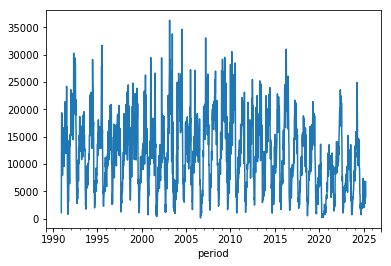

In [9]:
sorted_data['inc'] = sorted_data['inc'].astype("float")
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

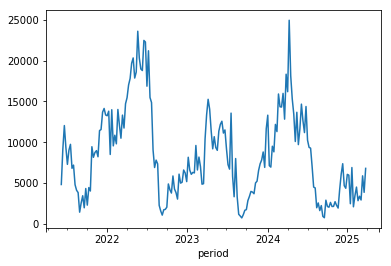

In [10]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [11]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [12]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    #assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

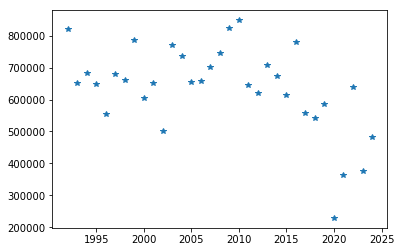

In [13]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [14]:
yearly_incidence.sort_values()

2020    229363.0
2021    363278.0
2023    374740.0
2024    481618.0
2002    502271.0
2018    543281.0
1996    553859.0
2017    557449.0
2019    584926.0
2000    605096.0
2015    613286.0
2012    620315.0
2022    638443.0
2011    645042.0
1995    648598.0
2001    650660.0
1993    653058.0
2005    654308.0
2006    657482.0
1998    660316.0
2014    673458.0
1997    679308.0
1994    682920.0
2007    701566.0
2013    708874.0
2004    736266.0
2008    745701.0
2003    770211.0
2016    780645.0
1999    784963.0
1992    821558.0
2009    822819.0
2010    848236.0
dtype: float64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

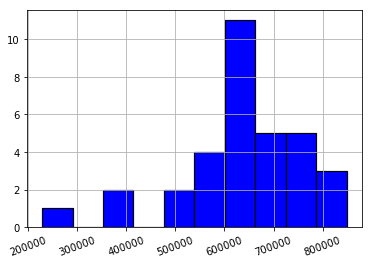

In [15]:
yearly_incidence.hist(xrot=20, color='blue', edgecolor='black', linewidth=1.2)

In [16]:
for n, i in enumerate(yearly_incidence):
    if i == yearly_incidence.min():
        print(n+1992) #start in 1991, +1 because index start at 0

2020


In [17]:
for n, i in enumerate(yearly_incidence):
    if i == yearly_incidence.max():
        print(n+1992) #start in 1991, +1 because index start at 0

2010
